In [2]:
import numpy as np
import sys
import time
np.set_printoptions(threshold=sys.maxsize)
convergence=False

In [25]:
x=np.arange(0,100)/10
y=np.square(x)

In [4]:
y

array([0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02, 1.600e-01, 2.500e-01,
       3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01, 1.000e+00, 1.210e+00,
       1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00, 2.560e+00, 2.890e+00,
       3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00, 4.840e+00, 5.290e+00,
       5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00, 7.840e+00, 8.410e+00,
       9.000e+00, 9.610e+00, 1.024e+01, 1.089e+01, 1.156e+01, 1.225e+01,
       1.296e+01, 1.369e+01, 1.444e+01, 1.521e+01, 1.600e+01, 1.681e+01,
       1.764e+01, 1.849e+01, 1.936e+01, 2.025e+01, 2.116e+01, 2.209e+01,
       2.304e+01, 2.401e+01, 2.500e+01, 2.601e+01, 2.704e+01, 2.809e+01,
       2.916e+01, 3.025e+01, 3.136e+01, 3.249e+01, 3.364e+01, 3.481e+01,
       3.600e+01, 3.721e+01, 3.844e+01, 3.969e+01, 4.096e+01, 4.225e+01,
       4.356e+01, 4.489e+01, 4.624e+01, 4.761e+01, 4.900e+01, 5.041e+01,
       5.184e+01, 5.329e+01, 5.476e+01, 5.625e+01, 5.776e+01, 5.929e+01,
       6.084e+01, 6.241e+01, 6.400e+01, 6.561e+01, 

In [5]:
import matplotlib.pyplot as plt

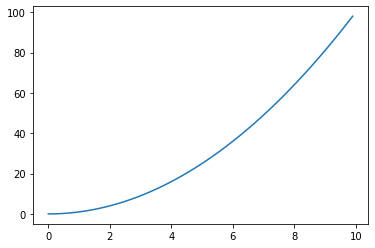

In [6]:
plt.plot(x,y)

In [7]:
data=np.vstack([x,y]).T

In [8]:
data[0]

array([0., 0.])

In [9]:
np.random.shuffle(data)

In [10]:
data=data.T

In [11]:
data[1]

array([1.600e+01, 3.025e+01, 8.100e-01, 1.225e+01, 1.936e+01, 4.410e+00,
       2.500e-01, 6.084e+01, 1.440e+00, 7.744e+01, 2.704e+01, 7.396e+01,
       9.000e+00, 5.184e+01, 2.304e+01, 9.409e+01, 8.464e+01, 1.000e-02,
       2.809e+01, 1.960e+00, 3.136e+01, 4.225e+01, 5.476e+01, 3.969e+01,
       8.410e+00, 7.840e+00, 2.250e+00, 7.290e+00, 8.649e+01, 1.156e+01,
       6.760e+00, 6.400e+01, 1.849e+01, 4.489e+01, 1.089e+01, 8.100e+01,
       9.000e-02, 1.369e+01, 2.916e+01, 2.025e+01, 2.560e+00, 6.400e-01,
       3.364e+01, 3.600e+01, 9.604e+01, 2.401e+01, 3.721e+01, 4.900e-01,
       6.889e+01, 1.600e-01, 4.761e+01, 4.900e+01, 9.801e+01, 4.000e+00,
       4.840e+00, 8.281e+01, 5.041e+01, 7.921e+01, 1.000e+00, 3.249e+01,
       9.216e+01, 1.444e+01, 6.724e+01, 5.760e+00, 9.610e+00, 2.601e+01,
       4.000e-02, 5.929e+01, 3.610e+00, 1.024e+01, 5.776e+01, 8.836e+01,
       2.209e+01, 4.356e+01, 5.625e+01, 7.056e+01, 7.569e+01, 6.241e+01,
       5.290e+00, 3.600e-01, 2.500e+01, 3.481e+01, 

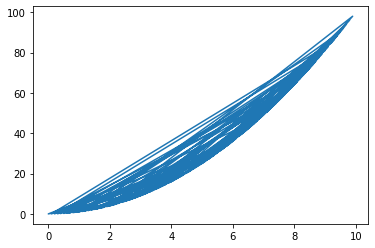

In [12]:
plt.plot(data[0],data[1])

In [13]:
weights=35
generalization_factor=[i for i in range(weights)]

In [56]:
class Model():
    def __init__(self,data,gn):
        self.weights=np.ones((35,1))
        self.gen_factor=gn
        self.x=data[0]
        self.y=data[1]
        
        self.min=0
        self.max=10
        self.weights_no=35
        #self.lr=0.0001
        self.lr=0.001
        self.total_loss=0
        self.total_prev_loss=0
        self.prev_loss=0
        self.total_loss=0
        self.dict_for_A={}
        self.ypred_list=[]
        #self.y_=x[1]
        self.len_of_val=100
        self.total_loss_p=0
        #self.epochs=199
        self.epochs=10000
        #print([i for i in self.x])
        #self.trial=int(np.floor((no_vector)*((i-self.min)/(self.min-self.max))))
        self.mapping=self.mapping_fn(self.gen_factor)#np.zeros((35,100))


    def mapping_fn(self,gn):
        no_vector=self.weights_no-self.gen_factor+1
        mapp=np.zeros((no_vector,self.weights_no))
        for i in self.x:
            #print(i)
            # if(i<self.min):
            #     index=0
            #     #index=(no_vector)*((i-self.min)/(self.min-self.max))
            #     mapp[:,index:index+self.gen_factor]=1
            #     #return mapp
            # if(i>self.max):
            #     index=34-self.gen_factor
            #     #index=(no_vector)*((i-self.min)/(self.min-self.max))
            #     #print('0')
            #     mapp[:,index:index+self.gen_factor]=1
            #     #return mapp
            # else:
                index=int(np.floor((no_vector)*((i-self.min)/(self.max-self.min))))
                #print(index)
                self.dict_for_A[i]=index
                mapp[index,index:index+self.gen_factor]=1
        return mapp
    def predict(self,x_A):
        #self.x_A_trail=x_A
        return x_A@self.weights
    
    def loss_fn(self,y_train,y_pred):
        #print(y_train)
        return (y_train- y_pred)
    
    def backprop(self,x,loss):
        weights=self.weights.copy()
        self.trail_type=type(weights)
        if len(weights.shape)==2:
        
            weights=np.reshape(weights,(weights.shape[0]))
        #print('shape_a_x- ',x.shape)
        #print('shape_weights- ',weights.shape)
        self.weights_trial=weights*self.lr
        
        self.trial_loss=loss 
        weights= weights+loss*weights*x*self.lr 
        weights=np.reshape(weights,self.weights.shape)
        self.weights=weights
        #return weights 
    
    def val_step(self,x,y):
        weights=self.weights
        
        y_pred=self.predict(x)
        self.ypred_list.append(y_pred)
        self.ypred_list_v.append(y_pred)
        loss=self.loss_fn(y,y_pred)
        
        self.total_loss+=loss
    def train_step(self,x,y):
        
        weights=self.weights
        y_pred=self.predict(x)
        self.ypred_list.append(y_pred)
        #print(y_pred)
        loss=self.loss_fn(y,y_pred)
        self.total_loss_p+=loss
        self.backprop(x,loss)
    def fit(self):
        start=time.time()
        epochs=self.epochs
        for e in range(epochs):
            self.total_prev_loss=self.total_loss
            self.total_loss=0
            self.total_loss_p=0
            self.ypred_list=[]
            self.ypred_list_v=[]
            for ip,op in zip(data[0,:70],data[1,:70]):
                #print(op)
                x_train=self.dict_for_A[ip]
                x_train=self.mapping[x_train,:]
                self.trial=x_train
                #y_train=self.dict_for_A[op]
                y_train=op
                #print(y_train)
                self.train_step(x_train,y_train)
            for ip,op in zip(data[0,70:],data[1,70:]):
                x_train=self.dict_for_A[ip]
                x_train=self.mapping[x_train,:]
                #y_train=self.dict_for_A[op]
                y_train=op
                self.val_step(x_train,y_train)
            error=self.error(np.array(self.ypred_list_v),data[1,70:])
            print('epoch:',e,' accuracy =',1-(error))    
            
            if self.is_converged():
                print('converge',self.gen_factor)
         
                break
        
        self.total_time=time.time()-start
            
    def error(self,y_pred,y_act):
        y_pred=y_pred.reshape(30)
        sub=np.subtract(y_pred,y_act)
        #sqr=np.abs(sub)
 
        sqr=np.square(sub)
        #self.y_p=y_pred
        #self.y_a=data[1]
        
        error=np.sum(sqr)

        total_error=np.sqrt(error)/self.len_of_val
        #self.sub=total_error
        return total_error
    
    def is_converged(self):
        if np.abs(self.total_prev_loss-self.total_loss)<0.00001:
            return True 
        else:
            return False
    
        

In [57]:
#model.sub

In [58]:
#model.y_a

In [66]:
list_of_models=[]
if convergence:
#for gn in range(1):#generalization_factor:
    for gn in generalization_factor:
        model=Model(data,gn)
        #model=Model(data,gn)
        model.fit()
        list_of_models.append(model)
        plt.plot(list_gn,list_converge_time,label='dis_cmac')
        #plt.plot(list_cn_2,gn_1,label='cont_cmac')
        plt.legend()
        plt.show()
else:
    model=Model(data,gn=5)
    model.fit()
    x1=np.array(model.ypred_list).reshape(100)
    data_pred=np.vstack([data[0],x1])

    data1=data_pred.copy().T
    data1=data1[(data1[:,0]).argsort()]
    data1=data1.T
    plt.plot(data1[0],data1[1],label='dis_cmac')
    plt.show()
#model.trial_loss
#model.x[1]
#model.mapping.shape
#print(model.mapping)
#data[0,:70]

epoch: 0  accuracy = -0.9900280986141667
epoch: 1  accuracy = -0.1310046326591836
epoch: 2  accuracy = 0.344686365681391
epoch: 3  accuracy = 0.5726650560401574
epoch: 4  accuracy = 0.7076121766326894
epoch: 5  accuracy = 0.7851040515876376
epoch: 6  accuracy = 0.8281359817414583
epoch: 7  accuracy = 0.8519061136027657
epoch: 8  accuracy = 0.86538531190466
epoch: 9  accuracy = 0.8735034853577485
epoch: 10  accuracy = 0.8787900779109035
epoch: 11  accuracy = 0.8825061109166138
epoch: 12  accuracy = 0.8852932922640087
epoch: 13  accuracy = 0.887495126652086
epoch: 14  accuracy = 0.8893065440957751
epoch: 15  accuracy = 0.8908442059708575
epoch: 16  accuracy = 0.8921811290370956
epoch: 17  accuracy = 0.8933647946992263
epoch: 18  accuracy = 0.8944271710332369
epoch: 19  accuracy = 0.8953905173397143
epoch: 20  accuracy = 0.8962708625303701
epoch: 21  accuracy = 0.8970801428256847
epoch: 22  accuracy = 0.8978275414069012
epoch: 23  accuracy = 0.8985203418953427
epoch: 24  accuracy = 0.8991

In [67]:
import time

In [68]:
model.total_time

2.5355842113494873

In [69]:
list_converge_time=[i.total_time for i in list_of_models]
#model.y_p

In [70]:
list_gn=[i.gen_factor for i in list_of_models]
#model.y_a

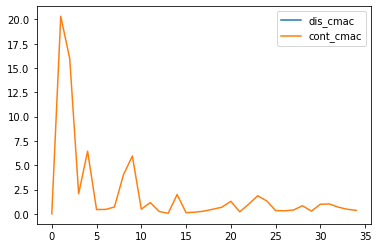

In [71]:
gn_1=[0.0027914047241210938, 20.320798873901367, 15.982682466506958, 2.078558921813965, 6.4488890171051025, 0.45371413230895996, 0.46411848068237305, 0.7118802070617676, 4.013280868530273, 5.956273555755615, 0.4900627136230469, 1.166435956954956, 0.25510263442993164, 0.058977365493774414, 1.9961328506469727, 0.13246726989746094, 0.18035650253295898, 0.291292667388916, 0.4868507385253906, 0.6924967765808105, 1.2956793308258057, 0.21932649612426758, 1.0121047496795654, 1.863940715789795, 1.3441402912139893, 0.3448762893676758, 0.3267848491668701, 0.40012502670288086, 0.8469932079315186, 0.2870674133300781, 0.9953253269195557, 1.0255999565124512, 0.6997344493865967, 0.482196569442749, 0.37040209770202637]
list_cn_2=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
plt.plot(list_gn,list_converge_time,label='dis_cmac')
plt.plot(list_cn_2,gn_1,label='cont_cmac')
plt.legend()

Text(0.5, 0, 'generalsation factor')

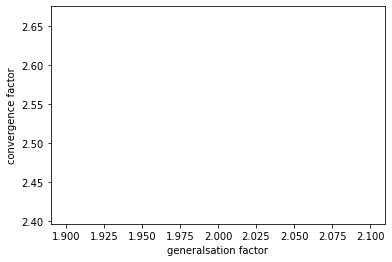

In [72]:
import matplotlib.pyplot as plt1

#plt1.xlabel('Longitude')
#plt1.ylabel('Latitude')
plt1.plot(list_gn,list_converge_time,label='dis_cmac')

plt.ylabel("convergence factor")


#plt.show()
plt.xlabel("generalsation factor")

In [80]:
x1=np.array(model.ypred_list).reshape(100)
data_pred=np.vstack([data[0],x1])

data1=data_pred.copy().T
data1=data1[(data1[:,0]).argsort()]
data1=data1.T

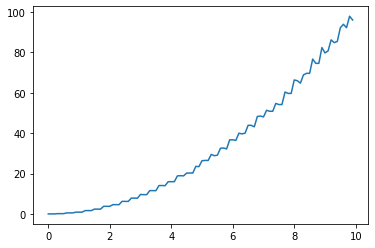

In [81]:
plt.plot(data1[0],data1[1],label='dis_cmac')

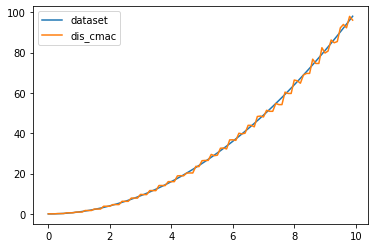

In [75]:
plt.plot(x,y,label='dataset')
plt.plot(data1[0],data1[1],label='dis_cmac')
plt.legend()

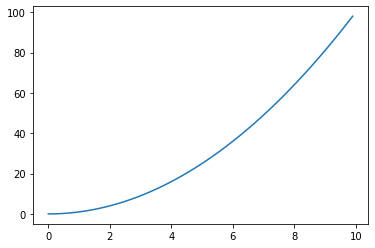

In [76]:
data_pred=np.vstack([data[0],x])

data1=data.copy().T
data1=data1[(data1[:,0]).argsort()]
data1=data1.T
plt.plot(data1[0],data1[1])

In [77]:
model.weights.shape

(35, 1)

In [455]:
min_=0
max_=99
no_vector=7
index=int(np.floor((no_vector)*((i-min_)/(min_-max_))))

In [375]:
zss={}
zss[0]=1
zss[1]=2
zss

{0: 1, 1: 2}

In [199]:
x[0]=1
#z[1]=1
#y[2]=1
data1=data.copy().T
data1=data1[(data1[:,1]).argsort()]
data1=data.T

In [200]:
arr = np.array([[-0.30565392, -0.96605562],
                [ 0.85331367, -2.62963495],
                [ 0.87839643, -0.28283675],
                [ 0.72676698,  0.93213482],
                [-0.52007354,  0.27752806],
                [-0.08701666,  0.22764316],
                [-1.78897817,  0.50737573],
                [ 0.62260038, -1.96012161],
                [-1.98231706,  0.36523876],
                [-1.07587382, -2.3022289 ]])

In [324]:
data[0].reshape((1,len(data[0])))

array([[94, 88,  8, 91, 36, 37, 93, 33, 53, 59, 82, 12, 76, 50,  1, 34,
        23, 18, 86, 40, 27, 65, 51, 19, 89, 41, 96,  3, 14, 55, 16,  2,
        83, 77, 70, 43, 71, 21, 28, 25, 85,  9, 97, 75, 80, 87, 32, 17,
        26, 69, 57, 38, 11, 29, 56, 47, 49, 81, 98, 42, 78, 31, 73, 45,
        46, 54, 66,  7, 67, 15, 13, 90, 30, 61,  5, 24, 68, 92, 84,  0,
        52, 64, 35, 44, 39, 62, 58, 74, 95, 60, 99, 20, 48,  6, 63, 22,
        10,  4, 72, 79]])

In [521]:
y=np.ones(3)
x=np.zeros(3)
x[2]=1
y.shape

(3,)

In [520]:
y*x

array([0., 0., 1.])

In [105]:
len(x.shape)

2

In [106]:
mapping=np.zeros((35,100))

In [108]:
mapping.shape

(35, 100)

In [110]:
mapping[:,0].shape

(35,)

In [460]:
   index=int(np.floor((no_vector)*((i-self.min)/(self.min-self.max))))
                self.dict_for_A[i]=index
                mapp[index,index:index+self.gen_factor]=1
no_vec=7-3+1
mapp=np.zeros((5,7))
for i in range(0,10):

    index=int(np.floor((no_vec)*((i)/(10))))
    mapp[index,index:index+3]=1

In [461]:
mapp

array([[1., 1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1.]])

In [180]:
for i,j in zip(data[0],data[1]):
    print(i,j)

28 784
20 400
38 1444
85 7225
74 5476
96 9216
59 3481
60 3600
13 169
1 1
37 1369
36 1296
67 4489
53 2809
98 9604
29 841
30 900
18 324
72 5184
55 3025
66 4356
41 1681
81 6561
52 2704
17 289
87 7569
56 3136
40 1600
62 3844
44 1936
80 6400
3 9
34 1156
50 2500
22 484
43 1849
31 961
46 2116
86 7396
45 2025
16 256
90 8100
70 4900
82 6724
7 49
88 7744
6 36
91 8281
64 4096
61 3721
77 5929
26 676
97 9409
83 6889
58 3364
54 2916
99 9801
2 4
51 2601
9 81
0 0
79 6241
42 1764
14 196
39 1521
33 1089
5 25
21 441
12 144
23 529
65 4225
92 8464
68 4624
89 7921
69 4761
49 2401
27 729
78 6084
11 121
10 100
47 2209
57 3249
75 5625
93 8649
4 16
8 64
95 9025
71 5041
19 361
48 2304
63 3969
73 5329
24 576
25 625
84 7056
32 1024
94 8836
35 1225
15 225
76 5776


In [176]:
data

array([[  28,   20,   38,   85,   74,   96,   59,   60,   13,    1,   37,
          36,   67,   53,   98,   29,   30,   18,   72,   55,   66,   41,
          81,   52,   17,   87,   56,   40,   62,   44,   80,    3,   34,
          50,   22,   43,   31,   46,   86,   45,   16,   90,   70,   82,
           7,   88,    6,   91,   64,   61,   77,   26,   97,   83,   58,
          54,   99,    2,   51,    9,    0,   79,   42,   14,   39,   33,
           5,   21,   12,   23,   65,   92,   68,   89,   69,   49,   27,
          78,   11,   10,   47,   57,   75,   93,    4,    8,   95,   71,
          19,   48,   63,   73,   24,   25,   84,   32,   94,   35,   15,
          76],
       [ 784,  400, 1444, 7225, 5476, 9216, 3481, 3600,  169,    1, 1369,
        1296, 4489, 2809, 9604,  841,  900,  324, 5184, 3025, 4356, 1681,
        6561, 2704,  289, 7569, 3136, 1600, 3844, 1936, 6400,    9, 1156,
        2500,  484, 1849,  961, 2116, 7396, 2025,  256, 8100, 4900, 6724,
          49, 7744,   3